In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("iris_data.csv")
labels = pd.read_csv("iris_labels.csv")

df_data = pd.DataFrame(data)

df_data[['pl','pw','sl','sw','id']] = df_data['pl;pw;sl;sw;id'].str.split(';', expand=True)
df_data.drop(['pl;pw;sl;sw;id'], axis=1, inplace=True)

print(df_data.head())


    pl   pw   sl   sw id
0  5.0  3.5  1.3  0.3  1
1  4.8  3.0  1.4  0.2  2
2  4.7  3.2  1.3  0.2  3
3  4.6  3.2  1.5  0.2  4
4  4.9  3.4  1.3  0.2  5


In [43]:
data.value_counts('species')


species
Iris-virginica     2998
Iris-setosa        2996
Iris-versicolor     500
Name: count, dtype: int64

In [5]:
df_labels = pd.DataFrame(labels)

df_labels[['examiner','id','species']] = df_labels['examiner;id;species'].str.split(';', expand=True)
df_labels.drop(['examiner;id;species'], axis=1, inplace=True)

print(df_labels.head())


  examiner id      species
0   Sobhan  1  Iris-setosa
1   Andrej  2  Iris-setosa
2    Ahmad  3  Iris-setosa
3   Matteo  4  Iris-setosa
4   Sobhan  5  Iris-setosa


In [6]:
data=pd.merge(df_data,df_labels,on='id',how='inner')
data

,pl,pw,sl,sw,id,examiner,species
0,5.0,3.5,1.3,0.3,1,Sobhan,Iris-setosa
1,4.8,3.0,1.4,0.2,2,Andrej,Iris-setosa
2,4.7,3.2,1.3,0.2,3,Ahmad,Iris-setosa
3,4.6,3.2,1.5,0.2,4,Matteo,Iris-setosa
4,4.9,3.4,1.3,0.2,5,Sobhan,Iris-setosa
...,...,...,...,...,...,...,...
6495,5.9,2.0,3.9,1.0,9963,Ahmad,Iris-versicolor
6496,6.0,2.8,4.3,1.5,9979,Ahmad,Iris-versicolor
6497,5.3,2.3,3.6,1.0,9982,Andrej,Iris-versicolor
6498,6.0,3.4,4.6,1.7,9986,Andrej,Iris-versicolor


In [7]:
data.drop(['examiner'],axis=1,inplace=True)



In [8]:
data=data.sort_values('species')

In [9]:
data

,pl,pw,sl,sw,id,species
0,5.0,3.5,1.3,0.3,1,Iris-setosa
3542,4.8,2.9,1.3,0.2,5402,Iris-setosa
3543,4.8,3.1,1.1,0.3,5403,Iris-setosa
3544,5.0,3.6,1.3,0.2,5405,Iris-setosa
3545,5.5,3.7,1.7,0.5,5406,Iris-setosa
...,...,...,...,...,...,...
3817,7.3,2.7,6.2,1.9,5831,Iris-virginica
3818,8.0,3.8,6.4,2.1,5832,Iris-virginica
3819,6.4,2.7,5.6,2.3,5833,Iris-virginica
3891,7.1,3.4,6.0,2.4,5960,Iris-virginica


In [10]:
data.value_counts("species")

species
Iris-setosa        3000
Iris-virginica     3000
Iris-versicolor     500
Name: count, dtype: int64

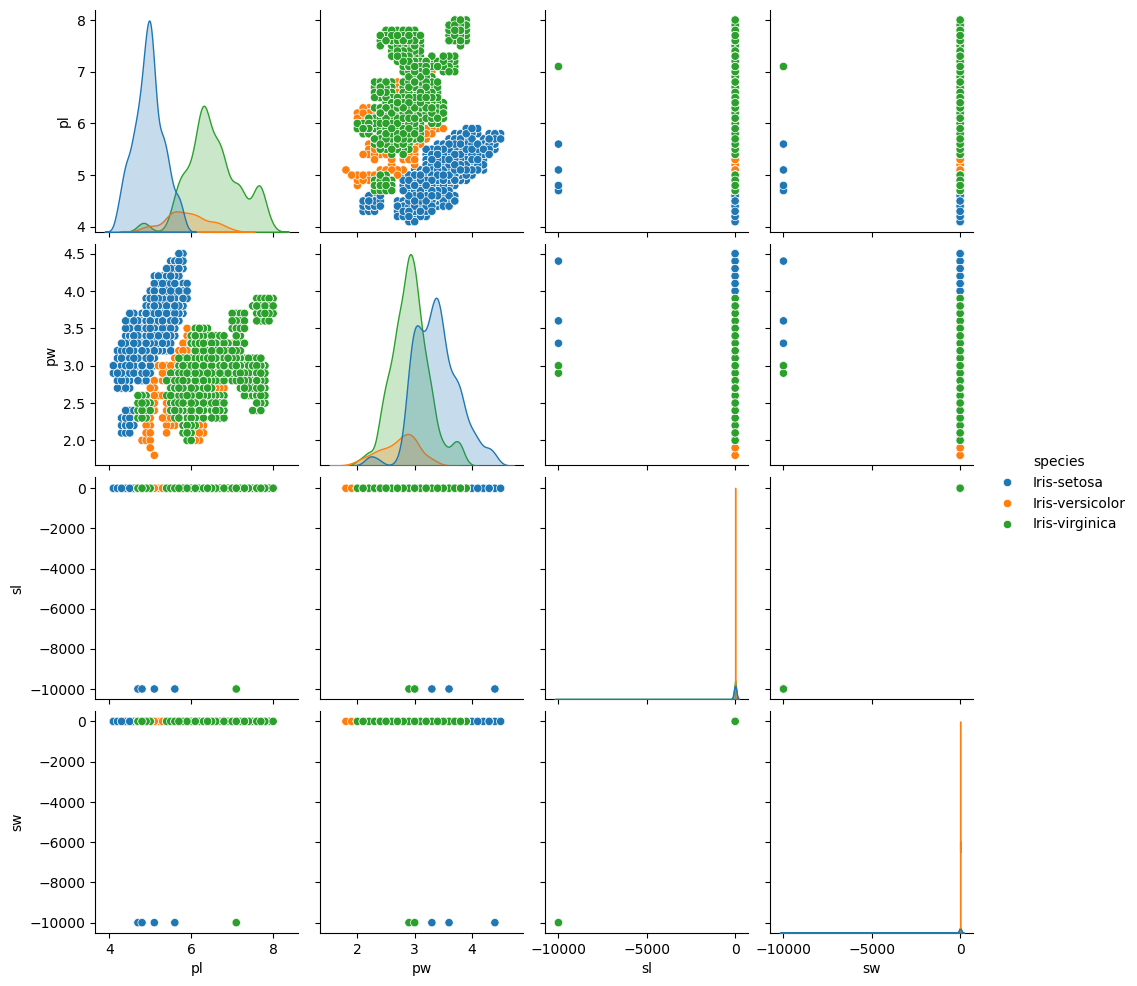

In [11]:
# Convert to numeric
data[['pl','pw','sl','sw']] = data[['pl','pw','sl','sw']].astype(float)

# Pairplot
import seaborn as sns
sns.pairplot(data, hue="species")


In [12]:
print (data.count)

<bound method DataFrame.count of        pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402     Iris-setosa
3543  4.8  3.1  1.1  0.3  5403     Iris-setosa
3544  5.0  3.6  1.3  0.2  5405     Iris-setosa
3545  5.5  3.7  1.7  0.5  5406     Iris-setosa
...   ...  ...  ...  ...   ...             ...
3817  7.3  2.7  6.2  1.9  5831  Iris-virginica
3818  8.0  3.8  6.4  2.1  5832  Iris-virginica
3819  6.4  2.7  5.6  2.3  5833  Iris-virginica
3891  7.1  3.4  6.0  2.4  5960  Iris-virginica
4279  6.4  2.7  5.3  1.9  6562  Iris-virginica

[6500 rows x 6 columns]>


In [13]:
data['sl']=pd.to_numeric(data['sl'],errors='coerce')
mean_sl=data['sl'].mean()
std_sl=data['sl'].std()

print("Average sepal length (sl):", mean_sl)
print("Standard deviation (sl):", std_sl)


Average sepal length (sl): -5.705507692307693
Standard deviation (sl): 303.7889483450809


In [14]:
data = data[(data != -9999).all(axis=1)]
print(data.count)

<bound method DataFrame.count of        pl   pw   sl   sw    id         species
0     5.0  3.5  1.3  0.3     1     Iris-setosa
3542  4.8  2.9  1.3  0.2  5402     Iris-setosa
3543  4.8  3.1  1.1  0.3  5403     Iris-setosa
3544  5.0  3.6  1.3  0.2  5405     Iris-setosa
3545  5.5  3.7  1.7  0.5  5406     Iris-setosa
...   ...  ...  ...  ...   ...             ...
3817  7.3  2.7  6.2  1.9  5831  Iris-virginica
3818  8.0  3.8  6.4  2.1  5832  Iris-virginica
3819  6.4  2.7  5.6  2.3  5833  Iris-virginica
3891  7.1  3.4  6.0  2.4  5960  Iris-virginica
4279  6.4  2.7  5.3  1.9  6562  Iris-virginica

[6494 rows x 6 columns]>


In [15]:
## TASK 3.1 ##
data['sl']=pd.to_numeric(data['sl'],errors='coerce')
mean_sl=data['sl'].mean()
std_sl=data['sl'].std()

print("Average sepal length (sl):", mean_sl)
print("Standard deviation (sl):", std_sl)


Average sepal length (sl): 3.5275947028025865
Standard deviation (sl): 2.1024922333854033


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\2157243133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sl']=pd.to_numeric(data['sl'],errors='coerce')


In [16]:

data['sl'] = pd.to_numeric(data['sl'], errors='coerce')

# Calculate Q1 and Q3
Q1 = data['sl'].quantile(0.25)
Q3 = data['sl'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove outliers
sl_no_outliers = data[(data['sl'] >= lower) & (data['sl'] <= upper)]['sl']

# Mean and standard deviation without outliers
mean_sl = sl_no_outliers.mean()
std_sl = sl_no_outliers.std()

print("Average sepal length (sl) after removing outliers:", mean_sl)
print("Standard deviation (sl) after removing outliers:", std_sl)


Average sepal length (sl) after removing outliers: 3.5202833821038038
Standard deviation (sl) after removing outliers: 2.018405706390843


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\3257613165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sl'] = pd.to_numeric(data['sl'], errors='coerce')


In [17]:
from scipy import stats

numeric_cols=['sl', 'sw', 'pl', 'pw']
X=data[numeric_cols]

z_scores=np.abs(stats.zscore(X))

no_outliner_data=data[(z_scores<3).all(axis=1)]

print("Original shape:", data.shape)
print("After removing outliers:", no_outliner_data.shape)


Original shape: (6494, 6)
After removing outliers: (6487, 6)


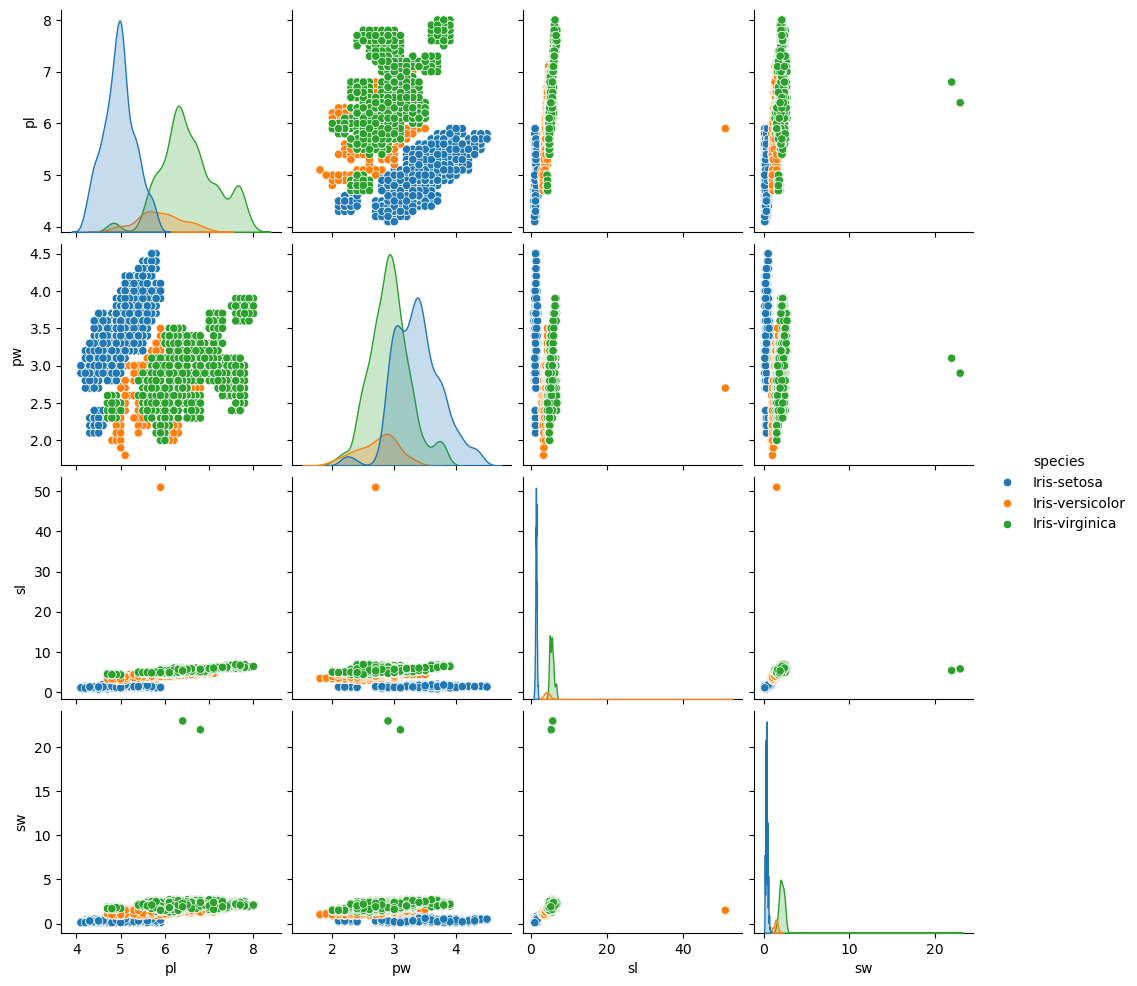

In [18]:

sns.pairplot(data, hue="species")


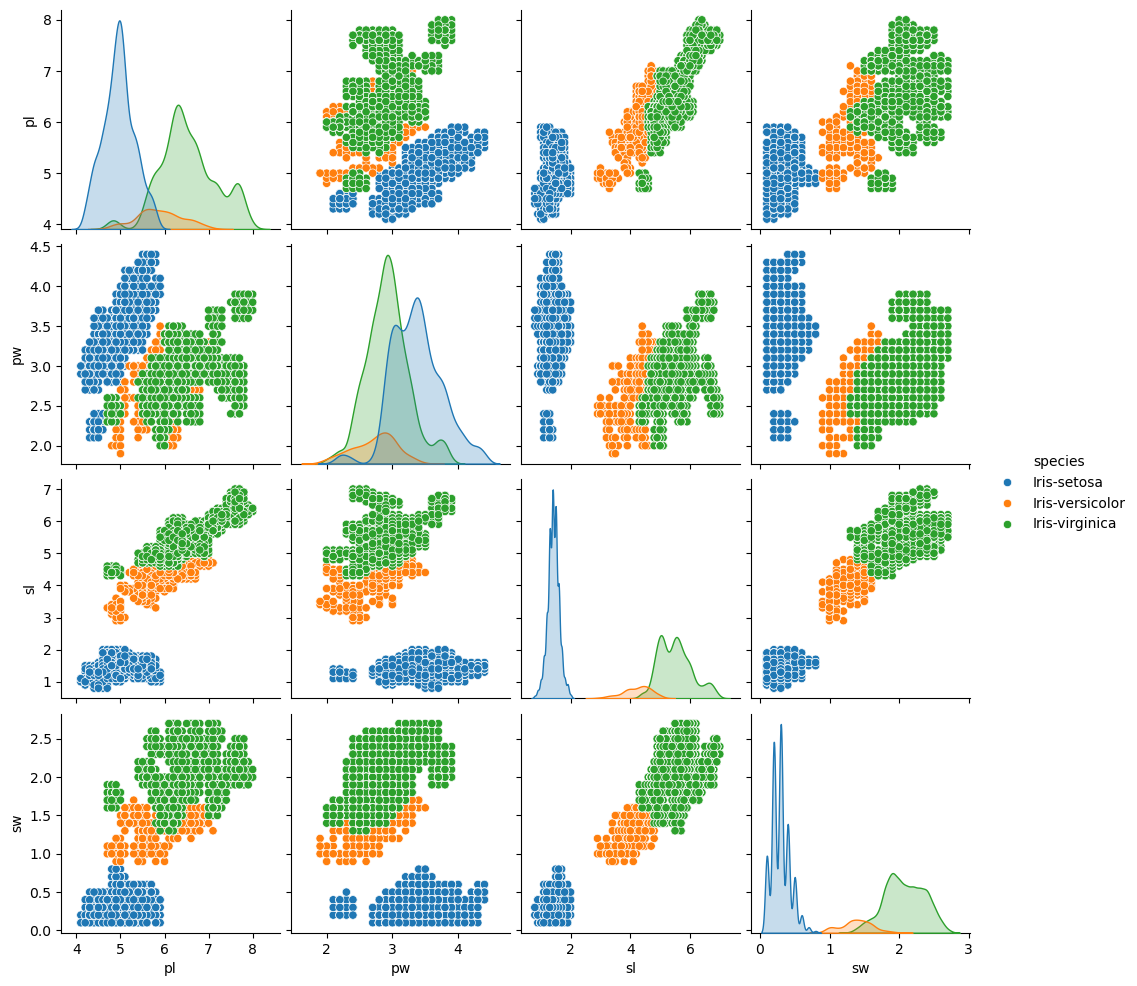

In [19]:
sns.pairplot(no_outliner_data, hue="species")


In [20]:
## TASK 4 ## 
from scipy import stats
stats.zscore(data['sl'])

array([-1.05958357, -1.05958357, -1.1547161 , ...,  0.98576577,
        1.17603083,  0.84306698])

In [21]:
## MinMax Normalization
from sklearn.preprocessing import MinMaxScaler
print("SL mean before MinMax Normalization = ",data['sl'].mean())
print("SL Standard Deviation before MinMax Normalization= ",data['sl'].std())
data['sl']=pd.to_numeric(data['sl'],errors='coerce')
scalar=MinMaxScaler()
data['sl_minmax'] = scalar.fit_transform(data[['sl']])

mean_sl=data['sl_minmax'].mean()
std_dev_sl=data['sl_minmax'].std()

print("SL mean After MinMax Normalization = ",mean_sl)
print("SL Standard Deviation After MinMax Normalization= ",std_dev_sl)

SL mean before MinMax Normalization =  3.5275947028025865
SL Standard Deviation before MinMax Normalization=  2.1024922333854033
SL mean After MinMax Normalization =  0.05433455583272086
SL Standard Deviation After MinMax Normalization=  0.04188231540608299


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\3508387686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sl']=pd.to_numeric(data['sl'],errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\3508387686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sl_minmax'] = scalar.fit_transform(data[['sl']])


In [22]:
print(X)
pashmak=scalar.fit_transform(X)

print(pashmak)

       sl   sw   pl   pw
0     1.3  0.3  5.0  3.5
3542  1.3  0.2  4.8  2.9
3543  1.1  0.3  4.8  3.1
3544  1.3  0.2  5.0  3.6
3545  1.7  0.5  5.5  3.7
...   ...  ...  ...  ...
3817  6.2  1.9  7.3  2.7
3818  6.4  2.1  8.0  3.8
3819  5.6  2.3  6.4  2.7
3891  6.0  2.4  7.1  3.4
4279  5.3  1.9  6.4  2.7

[6494 rows x 4 columns]
[[0.00996016 0.00873362 0.23076923 0.62962963]
 [0.00996016 0.00436681 0.17948718 0.40740741]
 [0.0059761  0.00873362 0.17948718 0.48148148]
 ...
 [0.09561753 0.09606987 0.58974359 0.33333333]
 [0.10358566 0.10043668 0.76923077 0.59259259]
 [0.08964143 0.07860262 0.58974359 0.33333333]]


In [23]:
## Standardization
print("SL mean before Standardization = ",data['sl'].mean())
print("SL Standard Deviation before Standardization= ",data['sl'].std())

from sklearn.preprocessing import StandardScaler
data['sl']=pd.to_numeric(data['sl'],errors='coerce')
standard_scaler=StandardScaler()
data['sl_standard']=standard_scaler.fit_transform(data[['sl']])

mean_standard_sl=data['sl_minmax'].mean()
std_dev_standard_sl=data['sl_minmax'].std()

print("SL mean After Standardization = ",mean_standard_sl)
print("SL Standard Deviation After Standardization= ",std_dev_standard_sl)


SL mean before Standardization =  3.5275947028025865
SL Standard Deviation before Standardization=  2.1024922333854033
SL mean After Standardization =  0.05433455583272086
SL Standard Deviation After Standardization=  0.04188231540608299


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\3182606658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sl']=pd.to_numeric(data['sl'],errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\3182606658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sl_standard']=standard_scaler.fit_transform(data[['sl']])


In [24]:
## PCA
from sklearn.decomposition import PCA

pca=PCA()
numerical_data=data[numeric_cols]

principal_components=pca.fit(numerical_data)

print(principal_components.explained_variance_ratio_)

[0.91329008 0.04017737 0.03231569 0.01421686]


In [27]:
pd.DataFrame(
    pca.components_,
    columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],
    index=["PC1", "PC2", "PC3", "PC4"]
).abs().mean(axis=0)


Sepal L    0.430356
Sepal W    0.353662
Petal L    0.441237
Petal W    0.385186
dtype: float64

In [38]:
sample=data.sample(n=150)
sample.value_counts("species")

species
Iris-setosa        76
Iris-virginica     62
Iris-versicolor    12
Name: count, dtype: int64

In [39]:
sample = data . sample ( n =150 , replace = True )
sample.value_counts("species")

species
Iris-virginica     79
Iris-setosa        64
Iris-versicolor     7
Name: count, dtype: int64

In [40]:
sample=data.groupby('species',group_keys=False).apply(
    lambda x: x.sample(frac=0.5)
)

sample.value_counts("species")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\3415641282.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample=data.groupby('species',group_keys=False).apply(


species
Iris-virginica     1499
Iris-setosa        1498
Iris-versicolor     250
Name: count, dtype: int64

In [41]:
sample=data.groupby('species',group_keys=False).apply(
    lambda x:x.sample(50)
)

sample.value_counts('species')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24864\372140361.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample=data.groupby('species',group_keys=False).apply(


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64